<h1>Lab Assignment One: Exploring Table Data</h1>

<h2>1. Business Understanding</h2>

Cars play an irreplaceable role in our daliy life. There are astronomically vehicle transcations happen every day. Most of them are used car transactions. In these transactions,price has always been an important issue for buyers and sellers beacuse buyers want to buy the best car at the lowest price and sellers want to sale the worst cars at the best price.

Used car database has over 370000 used cars datas and 17 features, including both numerical and categorical features. It matches the Lab One requirement and is free to download at kaggle.com.

Through visualizing the features, exploring the features relationships, and other methods, we are able to help buyers to know the influence of differet factors on price of used cars and able to help sellers know the correlation between price,gearbox,brand,fueltype,powerPS and other features. 

From the analyzing, the buyers could have an idea what is the bset car thay can buy under their budget. In addition, the seller could make a decision that whether they could buy the car to achieve the profit maximization.

Overall, the analytics also aid buyers and sellers to predict the price of car according to different features they got.

========================================================================

Dataset: Uesd cars database URL: https://www.kaggle.com/orgesleka/used-cars-database

Question Of Interest: Which features are the main factors for determing price for used cars?

<h2>2. Data Understanding</h2>
<h3>2.1 Data Description</h3>


In [1]:
# load the used car dataset
import pandas as pd
import numpy as np
import seaborn as sns;
import warnings
warnings.filterwarnings("ignore") 
sns.set(style = 'white', color_codes=True)
df = pd.read_csv('autos.csv',encoding='latin_1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/16 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,3/24/16 00:00,0.0,70435.0,4/7/16 03:16
1,3/24/16 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,3/24/16 00:00,0.0,66954.0,4/7/16 01:46
2,3/14/16 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/16 00:00,0.0,90480.0,4/5/16 12:47
3,3/17/16 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,3/17/16 00:00,0.0,91074.0,3/17/16 17:40
4,3/31/16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,3/31/16 00:00,0.0,60437.0,4/6/16 10:17


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 20 columns):
dateCrawled            371539 non-null object
name                   371539 non-null object
seller                 371538 non-null object
offerType              371538 non-null object
price                  371538 non-null float64
abtest                 371538 non-null object
vehicleType            333669 non-null object
yearOfRegistration     371537 non-null float64
gearbox                351329 non-null object
powerPS                371538 non-null float64
model                  351054 non-null object
kilometer              371538 non-null object
monthOfRegistration    371537 non-null float64
fuelType               338151 non-null object
brand                  371537 non-null object
notRepairedDamage      299477 non-null object
dateCreated            371537 non-null object
nrOfPictures           371537 non-null float64
postalCode             371537 non-null float64
lastSeen 

In [3]:
df.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


<h3>2.2 Data Quality</h3>

<h4>2.2.1 Cleaning Empty Data and Convert Date</h4>

In [4]:
#explain a little bit why these columns are not useful
#drop columns not in use
df.drop(['dateCrawled', 'monthOfRegistration', 'dateCreated', 
                   'lastSeen','seller','offerType','abtest','nrOfPictures'], axis=1, inplace=True)

In [5]:
# Clean data with empty value in model, price, gearbox or fuelType or vehicleType
df = df[(df['model'].notnull()) & (df['price'].notnull()) & (df['gearbox'].notnull()) & (df['fuelType'].notnull() & (df['vehicleType'].notnull()))]

In [6]:
# Discuss whether it's necessary: drop duplicates
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294512 entries, 2 to 371538
Data columns (total 12 columns):
name                  294512 non-null object
price                 294512 non-null float64
vehicleType           294512 non-null object
yearOfRegistration    294512 non-null float64
gearbox               294512 non-null object
powerPS               294512 non-null float64
model                 294512 non-null object
kilometer             294512 non-null object
fuelType              294512 non-null object
brand                 294512 non-null object
notRepairedDamage     256317 non-null object
postalCode            294512 non-null float64
dtypes: float64(4), object(8)
memory usage: 29.2+ MB


In [8]:
#default all records without value in notRepairedDamage to True
df['notRepairedDamage'].fillna('ja', inplace=True)

In [9]:
#replace value in notRepairedDamage to True and False
df['notRepairedDamage'].replace(['ja', 'nein'], [True, False], inplace=True)

In [10]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,suv,2004.0,automatik,163.0,grand,125000,diesel,jeep,True,90480.0
3,GOLF_4_1_4__3TÜRER,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000,benzin,volkswagen,False,91074.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000,diesel,skoda,False,60437.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650.0,limousine,1995.0,manuell,102.0,3er,150000,benzin,bmw,True,33775.0
6,Peugeot_206_CC_110_Platinum,2200.0,cabrio,2004.0,manuell,109.0,2_reihe,150000,benzin,peugeot,False,67112.0


In [11]:
#check null values in the dataframe
df.isnull().sum()

name                  0
price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
postalCode            0
dtype: int64

<h4>2.2.2 Cleaning Useless Data</h4>

In [12]:
# Only analyze cars registered between 1980 and 2017
print("Too old: {}".format(df.loc[df.yearOfRegistration < 1980].count()['price']))
print("Too new: {}".format(df.loc[df.yearOfRegistration >= 2018].count()['price']))
print("Too cheap: %d" % df.loc[df.price < 100].count()['name'])
print("Too expensive: " , df.loc[df.price > 150000].count()['name'])
print("Too few PS: " , df.loc[df.powerPS < 50].count()['name'])
print("Too many PS: " , df.loc[df.powerPS > 500].count()['name'])
##print("{} percent of the entire dataset is remained for analyze after Year of Registration Cleaning".format(df['price'].count() / old_df['price'].count() * 100))

Too old: 2378
Too new: 3
Too cheap: 5741
Too expensive:  120
Too few PS:  20183
Too many PS:  580


In [13]:
df = df[(df.yearOfRegistration >= 1980)&(df.yearOfRegistration <= 2017) 
        & (df.price >= 100) & (df.price <= 150000) 
        & (df.powerPS > 50) & (df.powerPS <= 800)]

In [14]:
#change dtype of kilometer from object to int
df['kilometer'] = df['kilometer'].apply(pd.to_numeric)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264552 entries, 2 to 371538
Data columns (total 12 columns):
name                  264552 non-null object
price                 264552 non-null float64
vehicleType           264552 non-null object
yearOfRegistration    264552 non-null float64
gearbox               264552 non-null object
powerPS               264552 non-null float64
model                 264552 non-null object
kilometer             264552 non-null int64
fuelType              264552 non-null object
brand                 264552 non-null object
notRepairedDamage     264552 non-null bool
postalCode            264552 non-null float64
dtypes: bool(1), float64(4), int64(1), object(6)
memory usage: 24.5+ MB


In [16]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode
count,264552.000000,264552.000000,264552.000000,264552.000000,264552.000000
mean,6592.934777,2003.560801,130.081939,125029.729505,52105.603636
std,8086.829940,5.781698,60.691387,39262.902390,25741.678892
min,100.000000,1980.000000,51.000000,5000.000000,1067.000000
25%,1600.000000,2000.000000,88.000000,100000.000000,31632.000000
50%,3899.000000,2004.000000,116.000000,150000.000000,51373.000000
75%,8500.000000,2008.000000,156.000000,150000.000000,73035.000000
max,150000.000000,2017.000000,776.000000,150000.000000,99998.000000


In [17]:
ddf = df.copy()

branddic = pd.Series(range(39),index=ddf.brand.unique()).to_dict()
vtdic = pd.Series(range(8),index=ddf.vehicleType.unique()).to_dict()
geardic = pd.Series(range(2),index=ddf.gearbox.unique()).to_dict()
fueldic = pd.Series(range(7),index=ddf.fuelType.unique()).to_dict()
modeldic = pd.Series(range(248),index=ddf.model.unique()).to_dict()
nrddic = pd.Series(range(2),index=ddf.notRepairedDamage.unique()).to_dict()

ddf['brand'] = ddf['brand'].map(branddic)
ddf['vehicleType'] = ddf['vehicleType'].map(vtdic)
ddf['gearbox'] = ddf['gearbox'].map(geardic)
ddf['fuelType'] = ddf['fuelType'].map(fueldic)
ddf['model'] = ddf['model'].map(modeldic)
ddf['notRepairedDamage'] = ddf['notRepairedDamage'].map(nrddic)

ddf.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,0,2004.0,0,163.0,0,125000,0,0,0,90480.0
3,GOLF_4_1_4__3TÜRER,1500.0,1,2001.0,1,75.0,1,150000,1,1,1,91074.0
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,1,2008.0,1,69.0,2,90000,0,2,1,60437.0
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650.0,2,1995.0,1,102.0,3,150000,1,3,0,33775.0
6,Peugeot_206_CC_110_Platinum,2200.0,3,2004.0,1,109.0,4,150000,1,4,1,67112.0


<h2>3. Data Visualization</h2>

<h3>3.1 Data Exploration</h3>

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

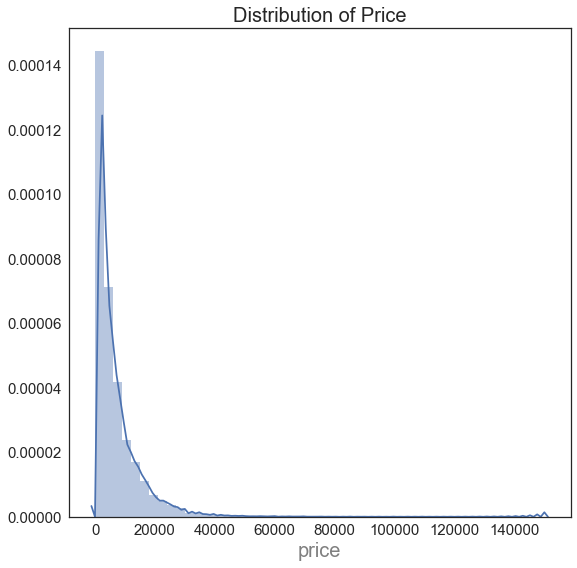

In [19]:
# distribution of price
plt.subplots(figsize=(9, 9))
plt.title('Distribution of Price', fontsize=20)
plt.xlabel('$Price$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(df['price'])
print()

According to the price distribution plot, we can tell that most of used cars in the market are under 20000, this makes sense since people tend to buy new cars if the they have more than 20000 in the pocket.

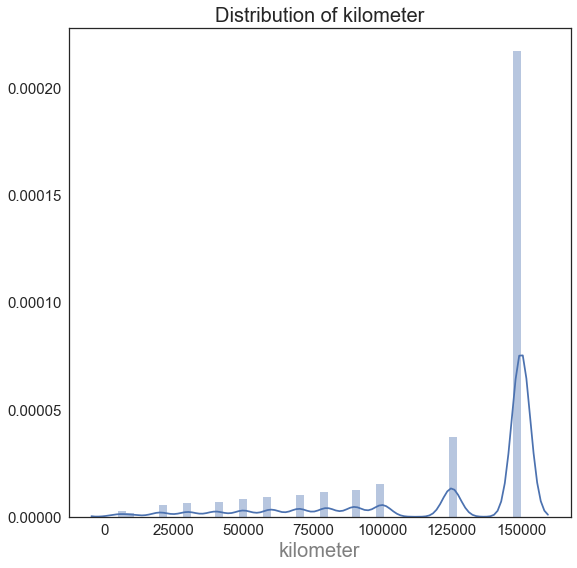

In [20]:
# distribution of kilometer
plt.subplots(figsize=(9, 9))
plt.title('Distribution of kilometer', fontsize=20)
plt.xlabel('$kilometer$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(df['kilometer'])

According to the kilometer distribution plot,it seems that most used cars's mileages are around 150000 kilometers.There are a few people sell their cars when the mileages are under 50000 kilometers. 

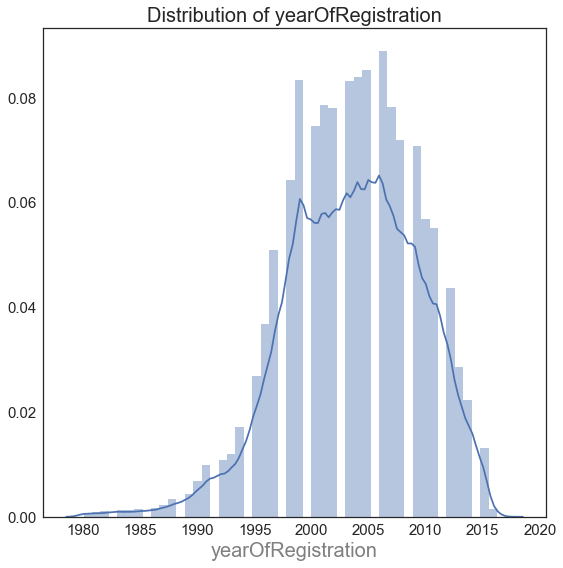

In [21]:
# distribution of year
plt.subplots(figsize=(9, 9))
plt.title('Distribution of yearOfRegistration', fontsize=20)
plt.xlabel('$yearOfRegistration$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(df['yearOfRegistration'])

According to the yearOfRegistration distribution plot,most used cars register between 1995s and 2015s. Most people will not choice a used car that has been registered for over 20 years! 

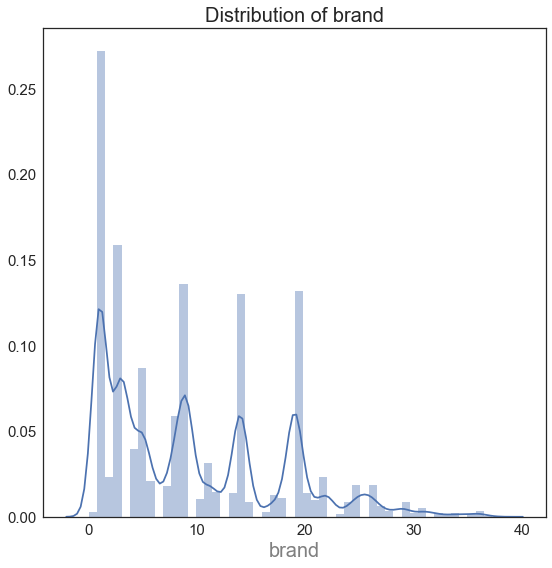

In [22]:
# distribution of brand
plt.subplots(figsize=(9, 9))
plt.title('Distribution of brand', fontsize=20)
plt.xlabel('$brand$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(ddf['brand'])

In [23]:
branddic

{'alfa_romeo': 15,
 'audi': 14,
 'bmw': 3,
 'chevrolet': 27,
 'chrysler': 31,
 'citroen': 25,
 'dacia': 28,
 'daewoo': 35,
 'daihatsu': 30,
 'fiat': 11,
 'ford': 5,
 'honda': 10,
 'hyundai': 20,
 'jaguar': 32,
 'jeep': 0,
 'kia': 21,
 'lada': 37,
 'lancia': 23,
 'land_rover': 36,
 'mazda': 6,
 'mercedes_benz': 9,
 'mini': 12,
 'mitsubishi': 18,
 'nissan': 7,
 'opel': 19,
 'peugeot': 4,
 'porsche': 24,
 'renault': 8,
 'rover': 33,
 'saab': 34,
 'seat': 22,
 'skoda': 2,
 'smart': 13,
 'subaru': 16,
 'suzuki': 29,
 'toyota': 26,
 'trabant': 38,
 'volkswagen': 1,
 'volvo': 17}

According to the brand distribution plot,most cars'brand in uesed cars are Skoda and people love to buy used cars which comes from thier own country.

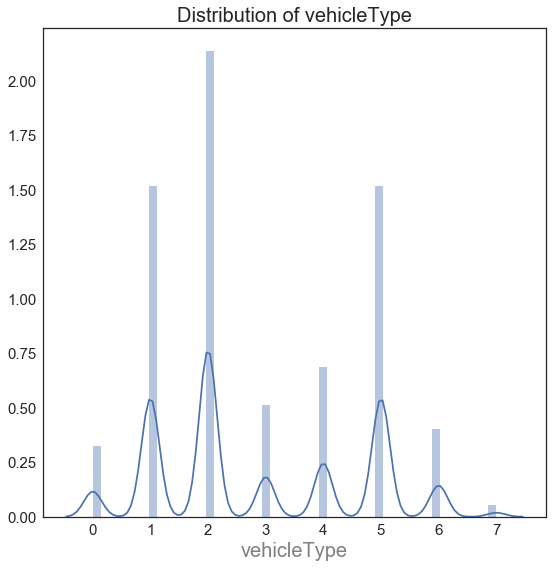

In [24]:
# distribution of vehicleType
plt.subplots(figsize=(9, 9))
plt.title('Distribution of vehicleType', fontsize=20)
plt.xlabel('$vehicleType$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(ddf['vehicleType'])

In [25]:
vtdic

{'andere': 7,
 'bus': 4,
 'cabrio': 3,
 'coupe': 6,
 'kleinwagen': 1,
 'kombi': 5,
 'limousine': 2,
 'suv': 0}

According to the vehicleType distribution plot,most cars which peopel want to trade are limousine cars.We can say that limousine cars are the most popular cars in used car database.

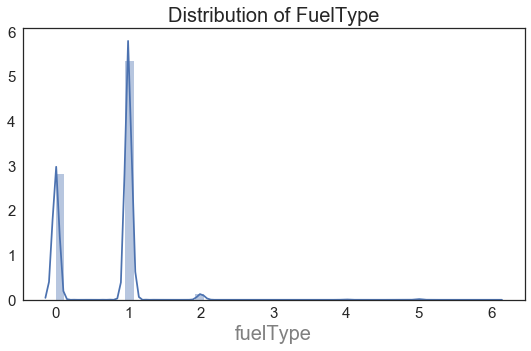

In [26]:
# distribution of fuelType
plt.subplots(figsize=(9, 5))
plt.title('Distribution of FuelType', fontsize=20)
plt.xlabel('$FuelType$', fontsize=20, color='gray')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.distplot(ddf['fuelType'])

In [27]:
fueldic

{'andere': 3,
 'benzin': 1,
 'cng': 5,
 'diesel': 0,
 'elektro': 6,
 'hybrid': 4,
 'lpg': 2}

According to the fuelType distribution plot,most of used cars' fuel type are (benzin)gasoline and (diesel)diesal.There are rarely used cars use lpg as their fuel.  

#### 3.1.1 Price by brand

Let's see the relation between the average price and brand

In [28]:
def label_price (row):
   if row['price'] <= 5000.0:
      return 1
   if (row['price'] > 5000.0) & (row['price'] <= 10000):      
      return 2
   if (row['price'] > 10000.0) & (row['price'] <= 15000.0):
      return 3
   if (row['price'] > 15000.0) & (row['price'] <= 20000.0):
      return 4
   if (row['price'] > 20000.0) & (row['price'] <= 25000.0):
      return 5
   if (row['price'] > 25000.0) & (row['price'] <= 30000.0):
      return 6
   if (row['price'] > 30000.0) & (row['price'] <= 35000.0):
      return 7
   if (row['price'] > 35000.0) & (row['price'] <= 40000.0):
      return 8
   if (row['price'] > 40000.0):
      return 9
   return 0
df['price_grp'] = df.apply (lambda row: label_price (row),axis=1)

In [29]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,price_grp
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,suv,2004.0,automatik,163.0,grand,125000,diesel,jeep,True,90480.0,2
3,GOLF_4_1_4__3TÜRER,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000,benzin,volkswagen,False,91074.0,1
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000,diesel,skoda,False,60437.0,1
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650.0,limousine,1995.0,manuell,102.0,3er,150000,benzin,bmw,True,33775.0,1
6,Peugeot_206_CC_110_Platinum,2200.0,cabrio,2004.0,manuell,109.0,2_reihe,150000,benzin,peugeot,False,67112.0,1


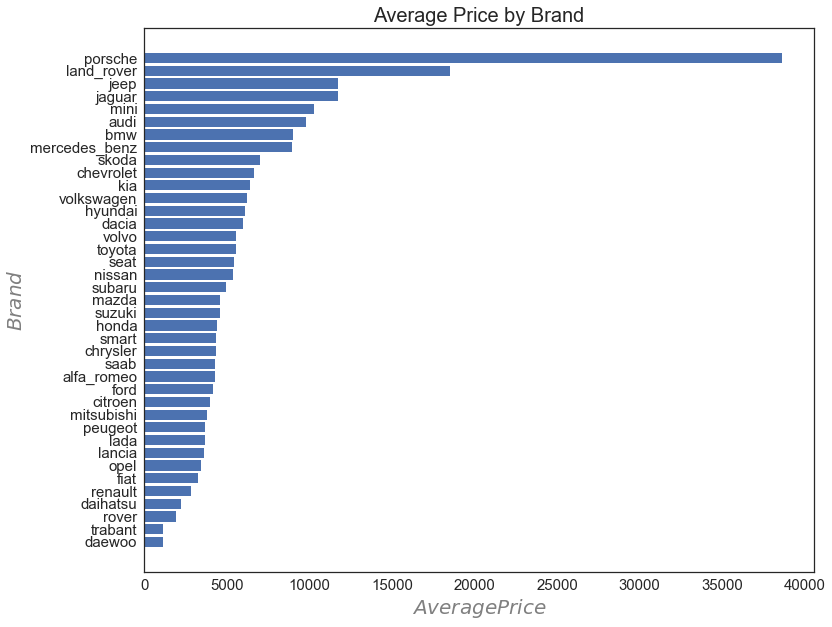

In [30]:
df_groupby_brand = df.groupby(by=['brand'])['price'].mean().sort_values()
a = df['brand'].unique()
r = range(len(a))

plt.figure(figsize=(12,10))
plt.barh(r, df_groupby_brand)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_brand.index, fontsize=15)
plt.title('Average Price by Brand', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$Brand$', fontsize=20, color='gray')
plt.show()

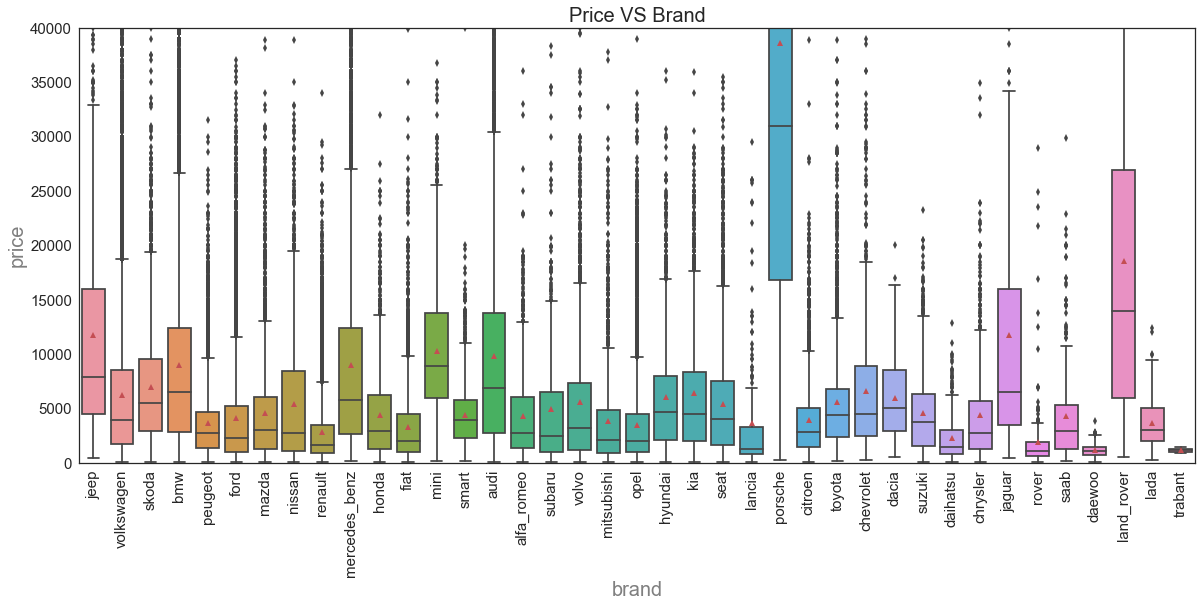

In [31]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylim((0, 40000))
plt.title('Price VS Brand', fontsize=20)
plt.xlabel('$brand$', fontsize=20, color='gray')
plt.ylabel('$price$', fontsize=20, color='gray')
sns.boxplot(x='brand', y='price', data=df, sym='r*', meanline=False, showmeans=True)

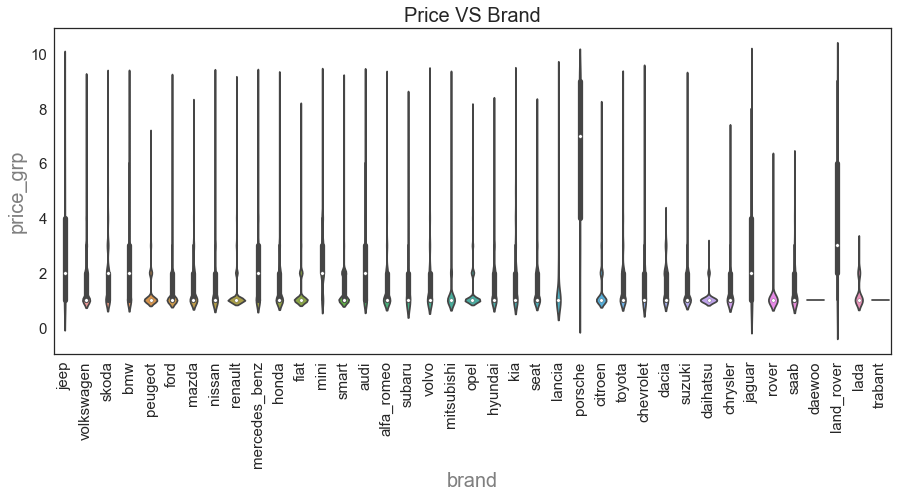

In [32]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS Brand', fontsize=20)
plt.xlabel('$brand$', fontsize=20, color='gray')
plt.ylabel('$price$', fontsize=20, color='gray')
sns.violinplot(x='brand',y='price_grp',data=df)

It seems that the cars of Porsche have the highest average price and most widely range of price.The average price of Porsche's used cars can reach to 35000 dollars  But if you don't have enough money,there are also lots of brands you can choice like daewoo,trabant and other brands.

#### 3.1.2 Price by vehicleType

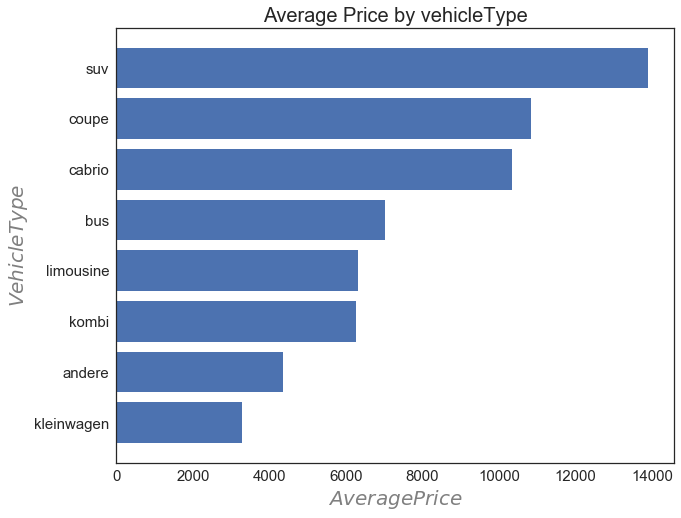

In [33]:
df_groupby_vehicleType = df.groupby(by=['vehicleType'])['price'].mean().sort_values()
r = range(len(df['vehicleType'].unique()))

plt.figure(figsize=(10, 8))
plt.barh(r, df_groupby_vehicleType)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_vehicleType.index, fontsize=15)
plt.title('Average Price by vehicleType', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$VehicleType$', fontsize=20, color='gray')
plt.show()

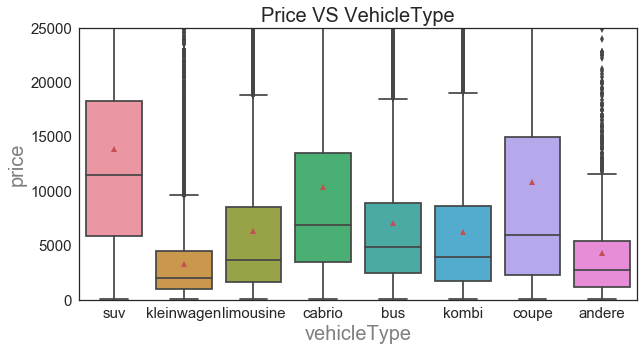

In [34]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0, 25000))
plt.title('Price VS VehicleType', fontsize=20)
plt.xlabel('$VehicleType$', fontsize=20, color='gray')
plt.ylabel('$Price$', fontsize=20, color='gray')
sns.boxplot(x='vehicleType', y='price', data=df, sym='r*', meanline=False, showmeans=True)

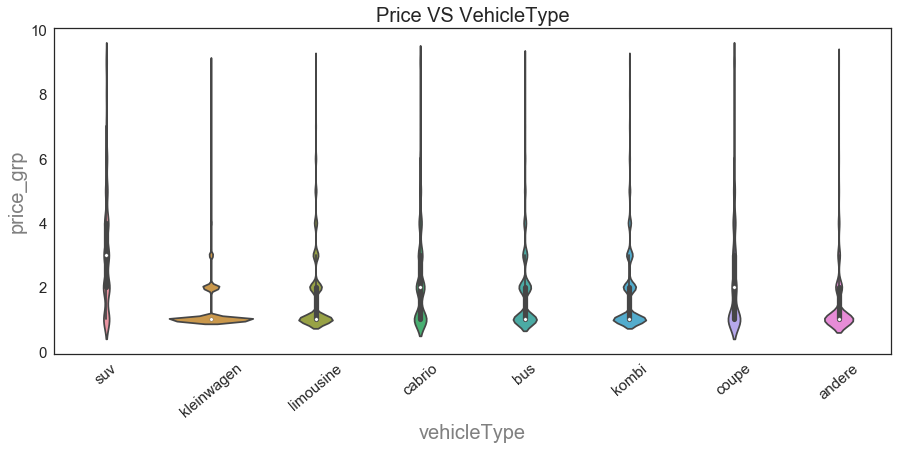

In [35]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS VehicleType', fontsize=20)
plt.xlabel('$VehicleType$', fontsize=20, color='gray')
plt.ylabel('$Price$', fontsize=20, color='gray')
sns.violinplot(x='vehicleType',y='price_grp',data=df)

From these charts, it's obvious that the highest avervage price vehicle type is SUV  because it has several off-road vehicle features like raised ground clearance and ruggedness, and available four-wheel drive.Coupe type cars have the most widely range of aveage price and the lowest price in out database of coupe type cars can beyond 2500 dollars.

#### 3.1.3 Price by gearbox

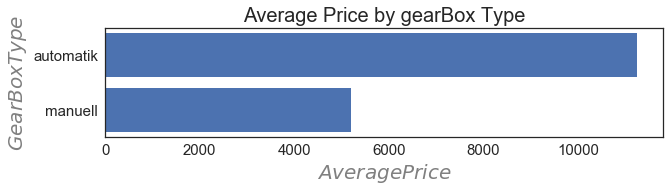

In [36]:
df_groupby_gearbox = df.groupby(by=['gearbox'])['price'].mean().sort_values()
r = range(len(df['gearbox'].unique()))

plt.figure(figsize=(10, 2))
plt.barh(r, df_groupby_gearbox)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_gearbox.index, fontsize=15)
plt.title('Average Price by gearBox Type', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$GearBox Type$', fontsize=20, color='gray')
plt.show()

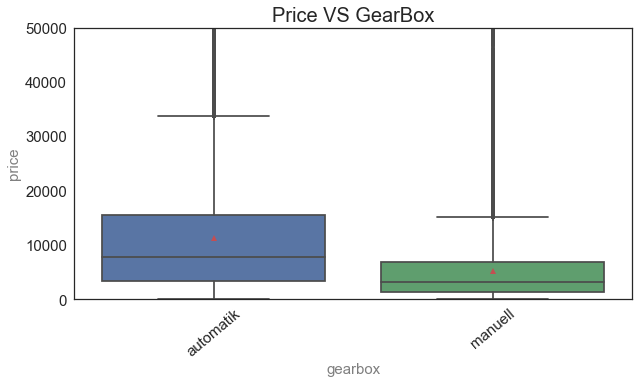

In [37]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS GearBox', fontsize=20)
plt.xlabel('$gearbox$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.boxplot(x='gearbox', y='price', data=df, sym='r*', meanline=False, showmeans=True)

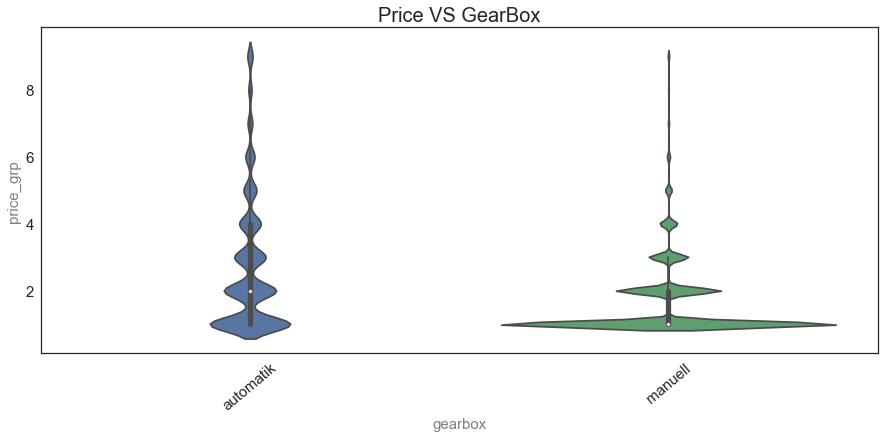

In [38]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS GearBox', fontsize=20)
plt.xlabel('$gearbox$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='gearbox',y='price_grp',data=df)

We can see from the relation between gearbox and price that the average price of automatic cars is higher than manuell cars. But we highly recommend you to buy automatic cars because vehicles equipped with automatic gearbox are not as complex to drive except unless you are a crazy fan of manuell cars.

#### 3.1.4 Price by fuelType

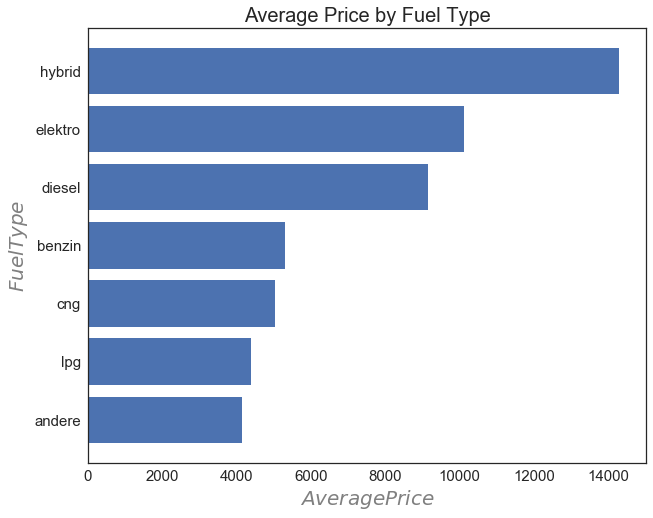

In [39]:
df_groupby_fuelType = df.groupby(by=['fuelType'])['price'].mean().sort_values()
r = range(len(df['fuelType'].unique()))

plt.figure(figsize=(10, 8))
plt.barh(r, df_groupby_fuelType)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_fuelType.index, fontsize=15)
plt.title('Average Price by Fuel Type', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$Fuel Type$', fontsize=20, color='gray')
plt.show()

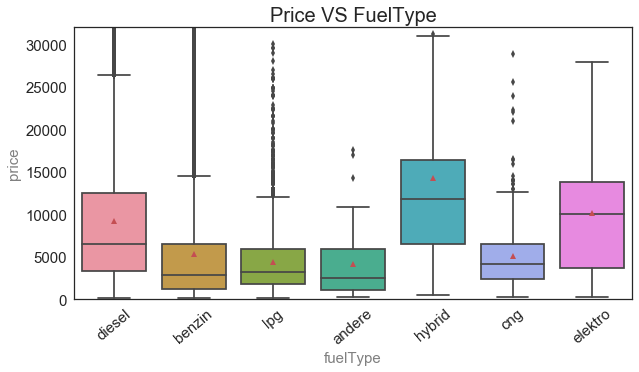

In [40]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 32000))
plt.title('Price VS FuelType', fontsize=20)
plt.xlabel('$fuelType$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.boxplot(x='fuelType', y='price', data=df, sym='r*', meanline=False, showmeans=True)

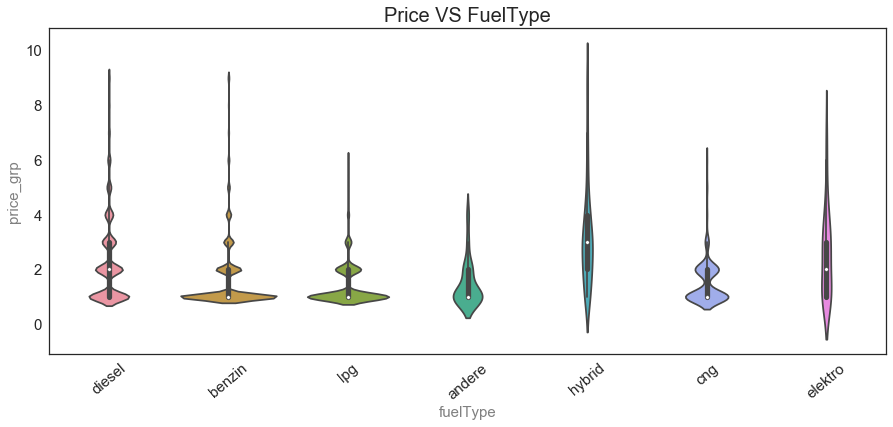

In [41]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS FuelType', fontsize=20)
plt.xlabel('$fuelType$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='fuelType',y='price_grp',data=df)

It seems that the average price of hybird and elektro(electrical) cars is higher than cars which fueltype is benzin(gasoline) or diesel. Because of advanced technology which is within hybrids, they may cost an extra dozen or $2000 or more over the conventional gasoline powered equivalent. The main reason for the difference in price besides the advanced technology is the cost of the batteries.

#### 3.1.5 Price by notRepairedDamage

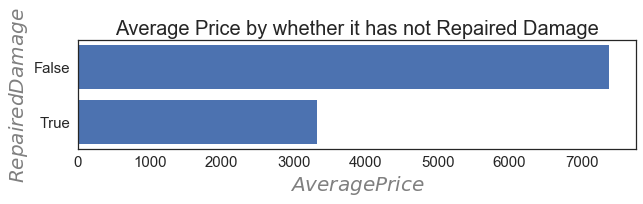

In [42]:
df_groupby_nRD = df.groupby(by=['notRepairedDamage'])['price'].mean().sort_values()
r = range(len(df['notRepairedDamage'].unique()))

plt.figure(figsize=(10, 2))
plt.barh(r, df_groupby_nRD)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_nRD.index, fontsize=15)
plt.title('Average Price by whether it has not Repaired Damage', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$Repaired Damage$', fontsize=20, color='gray')
plt.show()

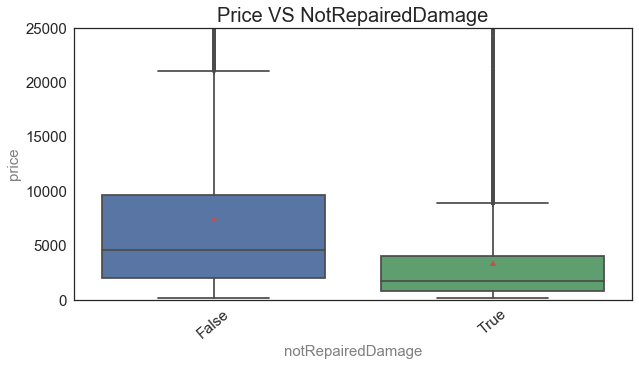

In [43]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 25000))
plt.title('Price VS NotRepairedDamage', fontsize=20)
plt.xlabel('$notRepairedDamage$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.boxplot(x='notRepairedDamage', y='price', data=df, sym='r*', meanline=False, showmeans=True)

We all know that the repaired damage can devalue the price of cars and these charts prove our thoughts.There are a few people want to buy a used cars which are under repaired damage except they have limit budget

#### 3.1.6 Price by Kilometer

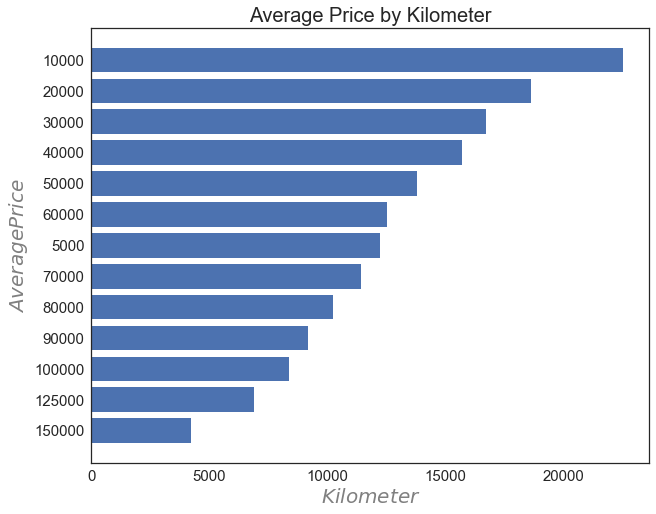

In [44]:
df_groupby_kilometer = df.groupby(by=['kilometer'])['price'].mean().sort_values()
r = range(len(df['kilometer'].unique()))

plt.figure(figsize=(10, 8))
plt.barh(r, df_groupby_kilometer)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_kilometer.index, fontsize=15)
plt.title('Average Price by Kilometer', fontsize=20)
plt.xlabel('$Kilometer$', fontsize=20, color='gray')
plt.ylabel('$Average Price$', fontsize=20, color='gray')
plt.show()

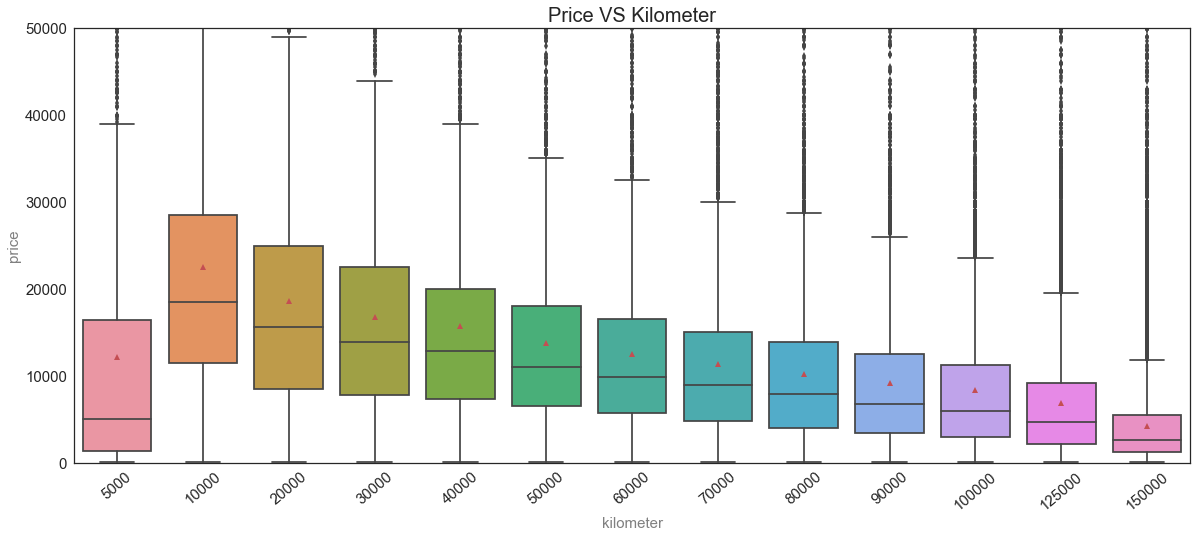

In [45]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 50000))
plt.title('Price VS Kilometer', fontsize=20)
plt.xlabel('$kilometer$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.boxplot(x='kilometer', y='price', data=df, sym='r*', meanline=False, showmeans=True)

In [46]:
p=min(df['price'])
q=max(df['price'])
print(q)

150000.0


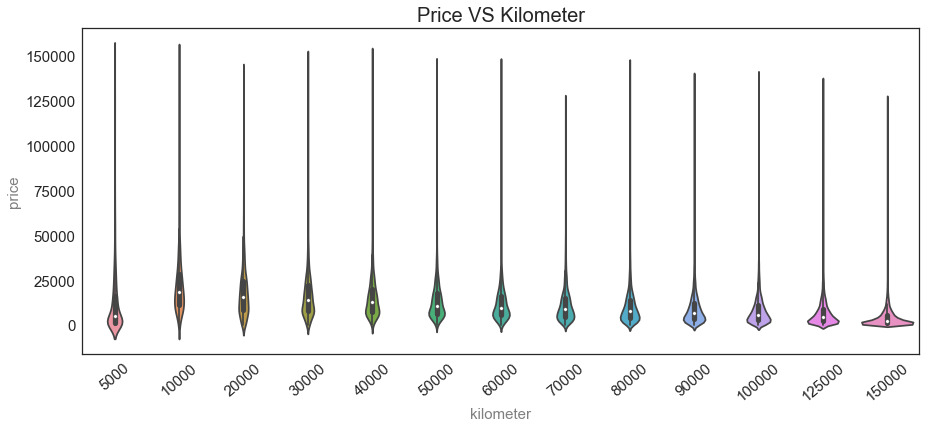

In [47]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS Kilometer', fontsize=20)
plt.xlabel('$kilometer$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='kilometer',y='price',data=df)

Distribution of Price VS Kilometer suggests that the average price will fall along with the increase in kilometers but the price of cars which  mileage less than 5000 is obviously different from other datas.

#### Why 5000 is abnormal?

In [48]:
df_groupby_a = df.groupby(by=['kilometer','notRepairedDamage'])

In [49]:
print(df_groupby_a['name'].count())

kilometer  notRepairedDamage
5000       False                  1531
           True                    659
10000      False                  1316
           True                     94
20000      False                  3831
           True                    401
30000      False                  4377
           True                    404
40000      False                  4839
           True                    410
50000      False                  5735
           True                    513
60000      False                  6403
           True                    628
70000      False                  7103
           True                    810
80000      False                  7790
           True                    936
90000      False                  8542
           True                   1222
100000     False                 10148
           True                   1591
125000     False                 24171
           True                   4448
150000     False                127

According to the graph above ,there are nearly one-third amount of cars which mileage is less than 5000 kilometers have repaired damages.The repaired damage is an important factor to devalue the price  of cars. So we assume that the reason for the abnormal graph is that some of repaired damage cars decrease the whole price of cars.

#### 3.1.7 Price by yearOfRegistration

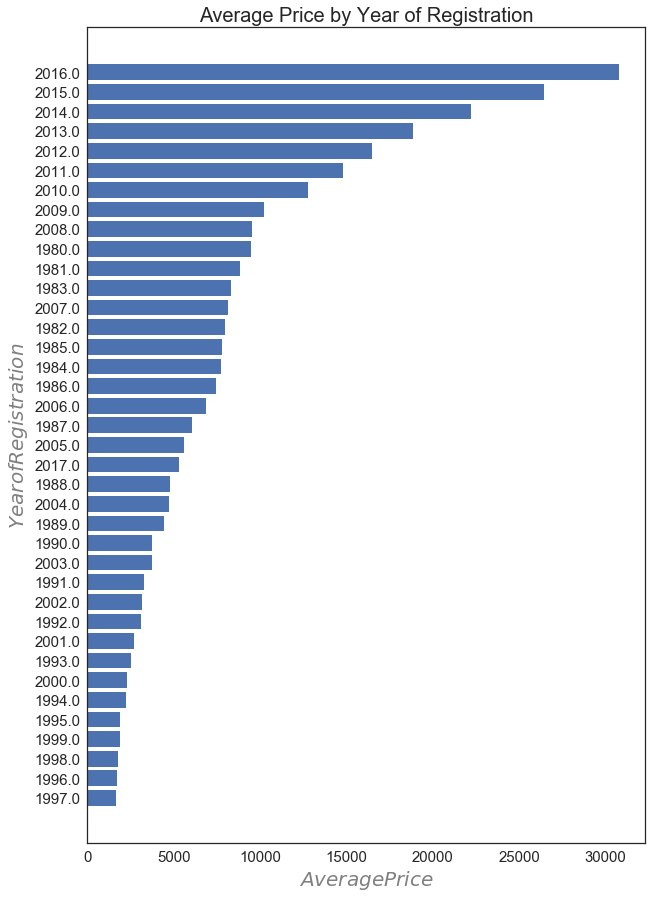

In [50]:
df_groupby_yOR = df.groupby(by=['yearOfRegistration'])['price'].mean().sort_values()
r = range(len(df['yearOfRegistration'].unique()))

plt.figure(figsize=(10, 15))
plt.barh(r, df_groupby_yOR)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_yOR.index, fontsize=15)
plt.title('Average Price by Year of Registration', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$Year of Registration$', fontsize=20, color='gray')
plt.show()

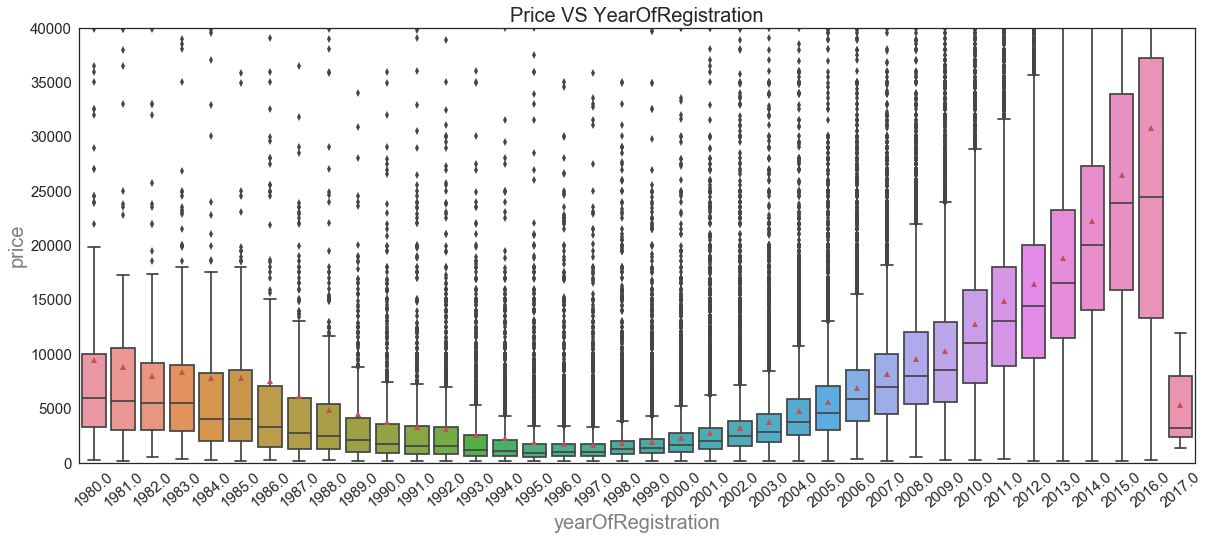

In [51]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
plt.ylim((0, 40000))
plt.title('Price VS YearOfRegistration', fontsize=20)
plt.xlabel('$yearOfRegistration$', fontsize=20, color='gray')
plt.ylabel('$Price$', fontsize=20, color='gray')
sns.boxplot(x='yearOfRegistration', y='price', data=df, sym='r*', meanline=False, showmeans=True)

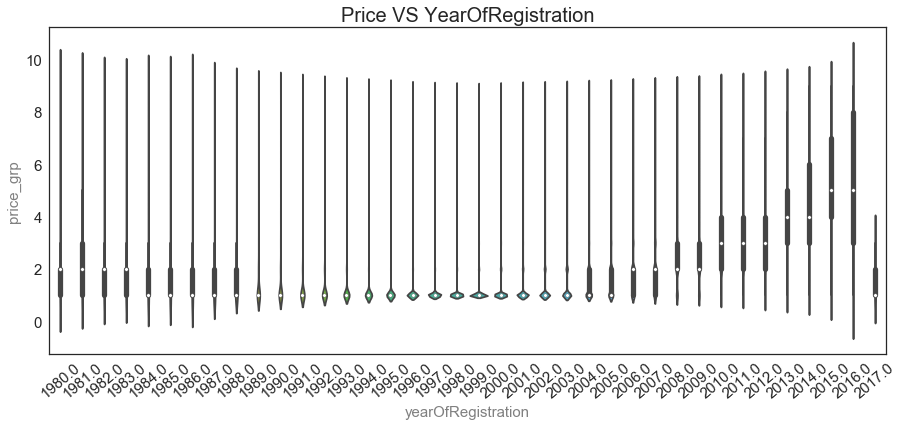

In [52]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15,rotation=40)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS YearOfRegistration', fontsize=20)
plt.xlabel('$YearOfRegistration$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='yearOfRegistration',y='price_grp',data=df)

Distribution of Price VS YearOfRegistration suggests that the price will increase along with year of registration after 1995s. Some used cars can be sold at a very high price beacuse some cars which year of registration before 1995s can be seen as vintage vehicles. 

#### 3.1.8 Price by PowerPS

In [53]:
# df["powerPS"].describe()

df['powerPS_Level'] = pd.cut(df['powerPS'],[50,150,250,350,1e4],
                            labels=['50-150','150-250','250-350',
                                   '>350'])
df['powerPS_Level'].describe()


count     264552
unique         4
top       50-150
freq      196954
Name: powerPS_Level, dtype: object

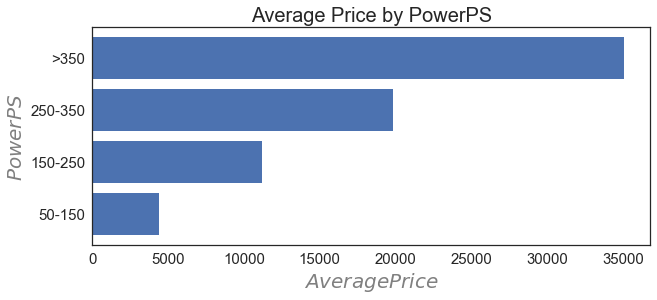

In [54]:
df_groupby_PS = df.groupby(by=['powerPS_Level'])['price'].mean().sort_values()
r = range(len(df['powerPS_Level'].unique()))

plt.figure(figsize=(10, 4))
plt.barh(r, df_groupby_PS)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_PS.index, fontsize=15)
plt.title('Average Price by PowerPS', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$PowerPS$', fontsize=20, color='gray')
plt.show()

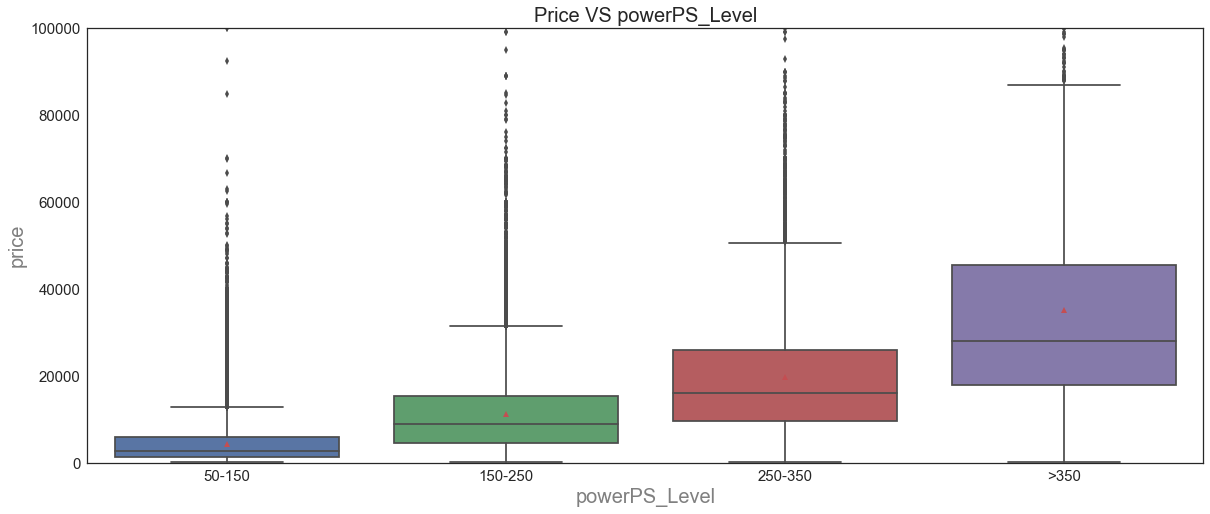

In [55]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0, 100000))
plt.title('Price VS powerPS_Level', fontsize=20)
plt.xlabel('$powerPS_Level$', fontsize=20, color='gray')
plt.ylabel('$Price$', fontsize=20, color='gray')
sns.boxplot(x='powerPS_Level', y='price', data=df, sym='r*', meanline=False, showmeans=True)

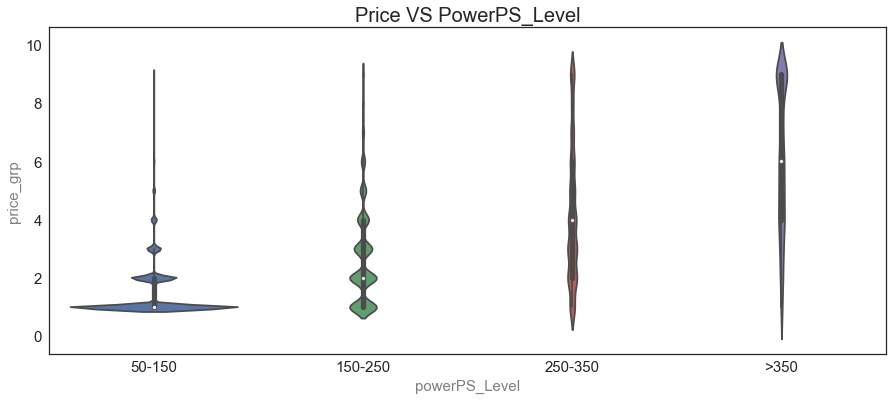

In [56]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS PowerPS_Level', fontsize=20)
plt.xlabel('$powerPS_Level$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='powerPS_Level',y='price_grp',data=df)

In [57]:
df.drop(['powerPS_Level'],axis=1,inplace=True)

It is obvious from these graphs that the price will go higher with the increase powerPS_Level and the increase ratio is not linear.To increase powerPS_level,you need to do lots of things like changing air filter,adding cold-air intake system and adding performance headers. These will cost a lot.So it make sense that increase ratio between price and powerPS_level is not linear.  

#### 3.1.9 Price by postalCode

In [58]:
Original = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
label = ['0-10000','10000-20000','20000-30000','30000-40000',
        '40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-99999']
df['postalCode_Level'] = pd.cut(df['postalCode'],Original,labels=label)

# df['postalCode_Level'].describe()

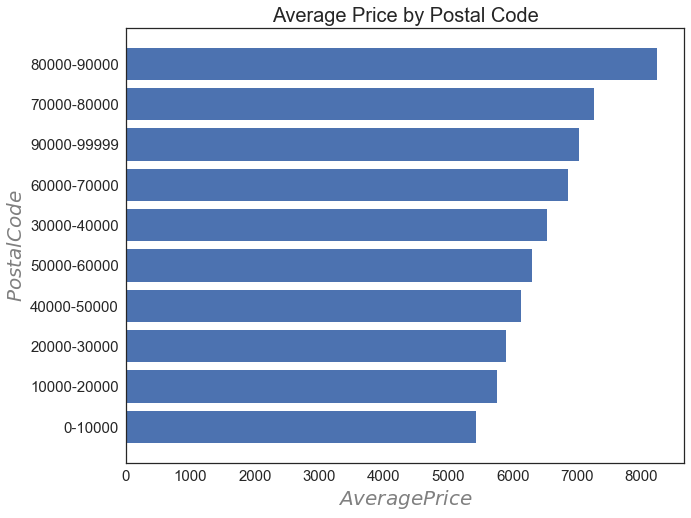

In [59]:
df_groupby_pCode = df.groupby(by=['postalCode_Level'])['price'].mean().sort_values()
r = range(len(df['postalCode_Level'].unique()))

plt.figure(figsize=(10, 8))
plt.barh(r, df_groupby_pCode)
plt.xticks(fontsize=15)
plt.yticks(r, df_groupby_pCode.index, fontsize=15)
plt.title('Average Price by Postal Code', fontsize=20)
plt.xlabel('$Average Price$', fontsize=20, color='gray')
plt.ylabel('$Postal Code$', fontsize=20, color='gray')
plt.show()

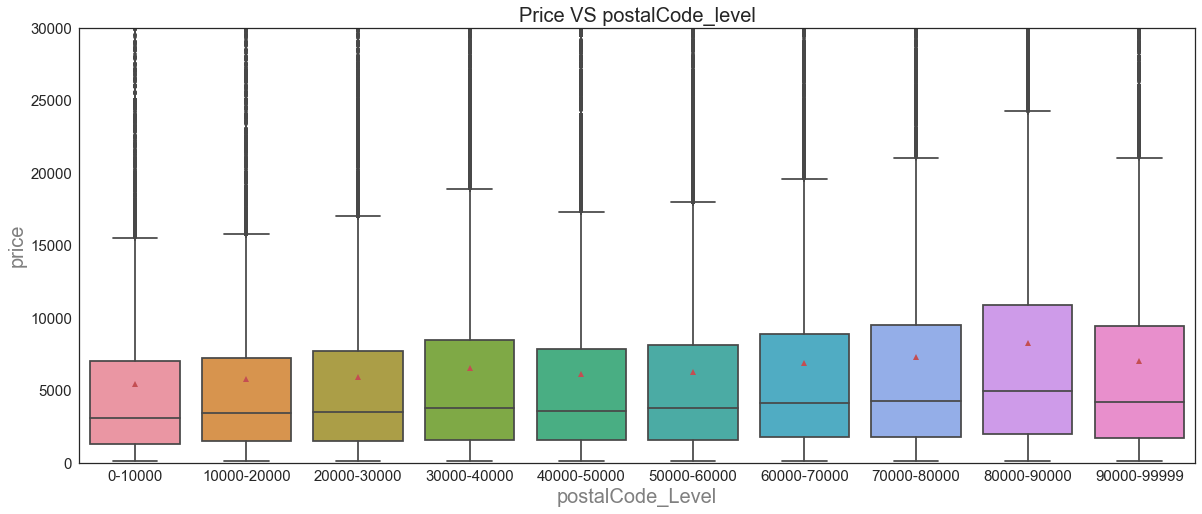

In [60]:
plt.figure(figsize=(20, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0, 30000))
plt.title('Price VS postalCode_level', fontsize=20)
plt.xlabel('$postalCode_Level$', fontsize=20, color='gray')
plt.ylabel('$Price$', fontsize=20, color='gray')
sns.boxplot(x='postalCode_Level', y='price', data=df, sym='r*', meanline=False, showmeans=True)

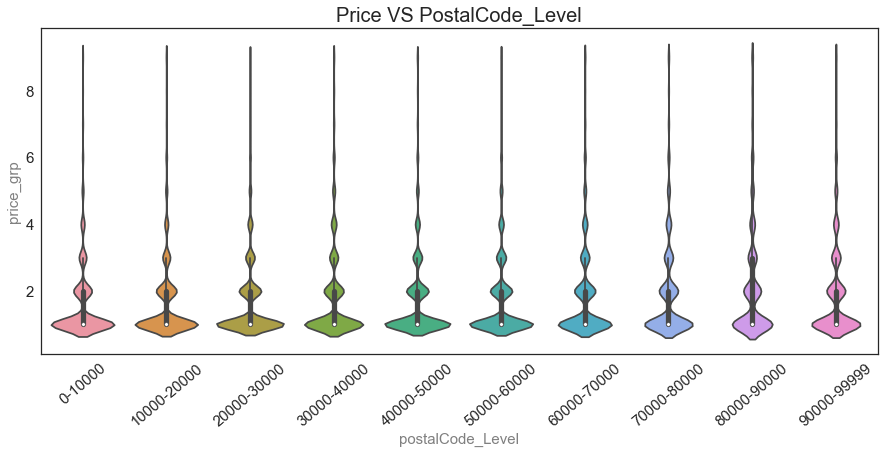

In [61]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15, rotation=40)
plt.yticks(fontsize=15)
#plt.ylim((0, 50000))
plt.title('Price VS PostalCode_Level', fontsize=20)
plt.xlabel('$postalCode_Level$', fontsize=15, color='gray')
plt.ylabel('$Price$', fontsize=15, color='gray')
sns.violinplot(x='postalCode_Level',y='price_grp',data=df)

In [62]:
df.drop(['postalCode_Level'],axis=1,inplace=True)

It seems that average price of used cars will increase with the increase postal numbers. We assume that the postal order is correlated to size of city in Germany. The more the size of city ,the more the order of postal.It makes sense that the price of used cars will increase with the increase postal numbers.

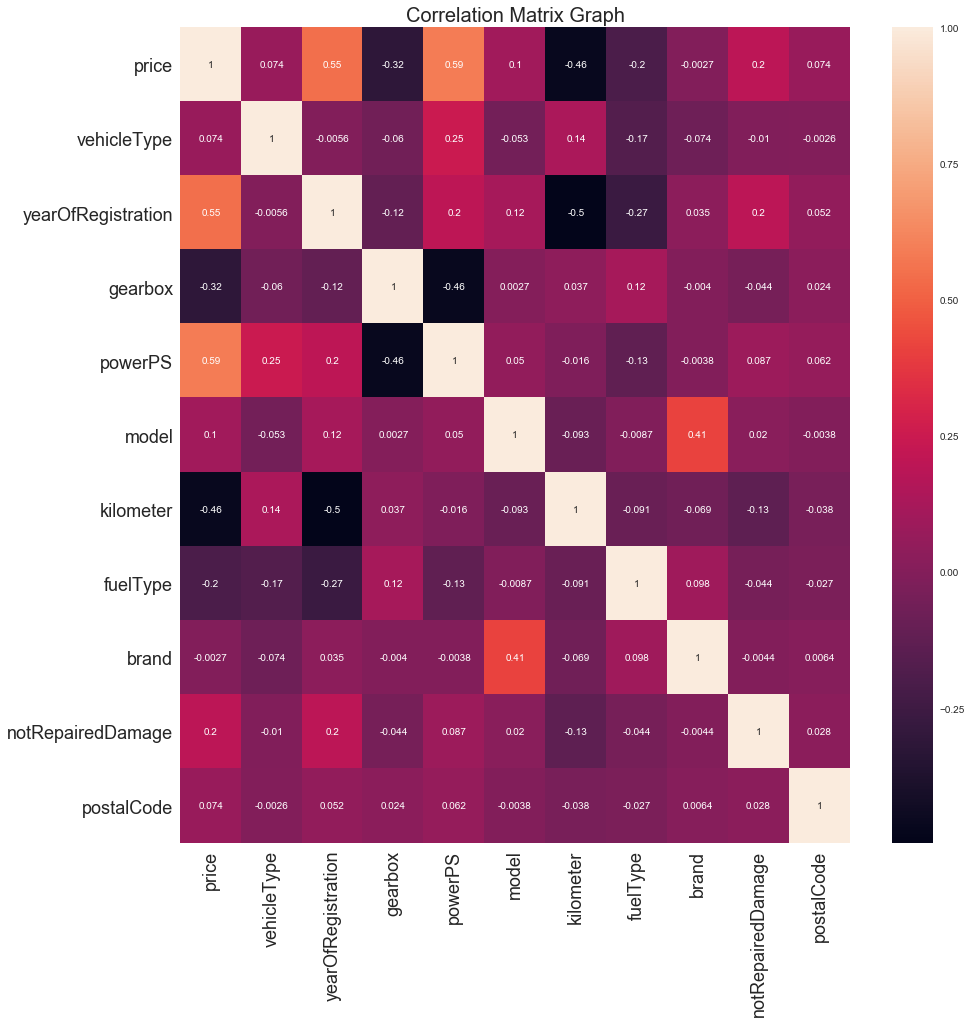

In [63]:
dc = ddf.corr()
plt.subplots(figsize=(15, 15))
plt.title('Correlation Matrix Graph', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
sns.heatmap(dc,annot=True)

According to the correlation table,"Price","vehicleType", "yearOfrrgistration", "PowerPS","model", "notRepairedDamage"and "postalCode" have positive correlation with each other. Through our table, we are focusing on left, it shows that price & gearbox and price & kilometer have comparatively strong negative correlation with each other, that means the higher the mileage level (or manual gearbox ) cars have, the less price they will be traded . price & powerPS has postive correlation with each other, that means the higher people spent in trading used cars, the higher powerPs of cars they got.

## 4. Dimensionality Reduction

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dff = ddf.drop(['name'],axis=1)
dff['price_grp'] = df['price_grp']
scaler.fit(dff)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
pca = PCA(n_components=2)
scaled_data = scaler.transform(dff)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [66]:
x_pca = pca.transform(scaled_data)
scaled_data.shape

(264552, 12)

In [67]:
x_pca.shape

(264552, 2)

From the shape change here, we can tell the dimension dropped from 12 to 2.

Text(0,0.5,'Second Principal Component')

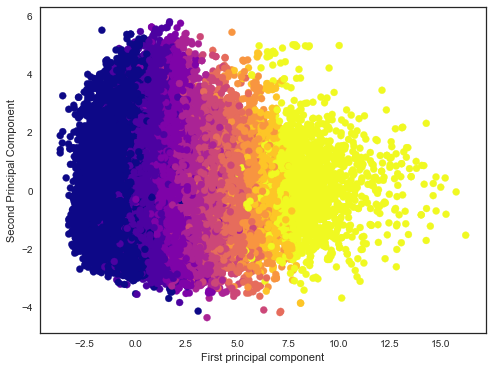

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dff['price_grp'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [69]:
pca.components_

array([[  5.08851560e-01,   6.46989843e-02,   3.79482946e-01,
         -2.44815760e-01,   3.58627272e-01,   8.30527936e-02,
         -2.92314956e-01,  -1.60210414e-01,   1.56701432e-02,
          1.53180680e-01,   5.63851885e-02,   5.09338991e-01],
       [ -1.77467670e-05,  -4.21997365e-01,   1.99332438e-01,
          2.68617512e-01,  -3.15773164e-01,   4.12083839e-01,
         -4.09419933e-01,   2.73853815e-01,   4.36178545e-01,
          8.57814517e-02,   1.65111412e-02,  -5.12107901e-04]])

In [70]:
df_comp = pd.DataFrame(pca.components_,columns=list(dff))

In [71]:
#finalDf = pd.concat([df_comp, df[['price_grp']]], axis = 1)

In [72]:
#finalDf

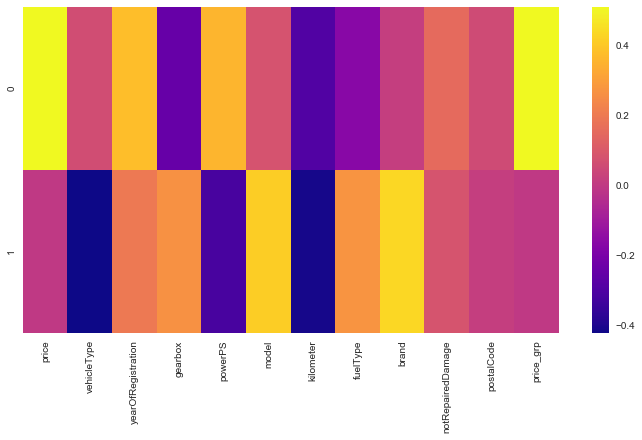

In [73]:
#df_comp = pd.DataFrame(pca.components_,columns=list(dff))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

In [74]:
#sns.pairplot(dff)

In [75]:
df.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,postalCode,price_grp
2,"Jeep_Grand_Cherokee_""Overland""",9800.0,suv,2004.0,automatik,163.0,grand,125000,diesel,jeep,True,90480.0,2
3,GOLF_4_1_4__3TÜRER,1500.0,kleinwagen,2001.0,manuell,75.0,golf,150000,benzin,volkswagen,False,91074.0,1
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600.0,kleinwagen,2008.0,manuell,69.0,fabia,90000,diesel,skoda,False,60437.0,1
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650.0,limousine,1995.0,manuell,102.0,3er,150000,benzin,bmw,True,33775.0,1
6,Peugeot_206_CC_110_Platinum,2200.0,cabrio,2004.0,manuell,109.0,2_reihe,150000,benzin,peugeot,False,67112.0,1


In [77]:
newdf = df[['price','yearOfRegistration', 'powerPS', 'kilometer','price_grp']]

In [78]:
newdf = newdf[1:5000]

In [80]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 3 to 7002
Data columns (total 5 columns):
price                 4999 non-null float64
yearOfRegistration    4999 non-null float64
powerPS               4999 non-null float64
kilometer             4999 non-null int64
price_grp             4999 non-null int64
dtypes: float64(3), int64(2)
memory usage: 234.3 KB


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.cross_validation import train_test_split

/Users/jianguo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [82]:
X = newdf.drop('price_grp', axis=1)
y = newdf['price_grp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [83]:
%%time
# from last time, our logistic regression algorithm is given by (including everything we previously had):
class BinaryLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.001, method='bfgs', reg='l2'):
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.method = method
        self.reg = reg
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
     # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

CPU times: user 41 µs, sys: 2 µs, total: 43 µs
Wall time: 47.9 µs


In [84]:
%%time
class LogisticRegressionBase(BinaryLogisticRegression):
    
    def __init__(self,
                eta=0.1,
                iterations=500,
                C=0.1,
                method='bfgs',
                reg='l2'
               ):
        super().__init__(
            eta=eta,
            iterations=iterations,
            C=C,
            method=method,
            reg=reg
        )
    # stochastic gradient calculation 
    def _get_gradient(self,X,y):
        if self.method == "stochastic":
            gradient = self._get_stochastic_gradient(X, y)
        elif self.method == "bfgs":
            gradient = self._get_bfgs_method_gradient(X, y)
        elif self.method == "steepest":
            gradient = self._get_steepest_descent_gradient(X, y)
        else:
            return
        if self.reg == "L2":
            # derivative of the L2 Norm of the weights, exclude bias term  piecewise function np.sign
            gradient[1:] += -2 * self.w_[1:] * self.C  
        elif self.reg == "L1":
            gradient[1:] += np.sign(self.w_[1:]) * self.C  # exclude bias term
        elif self.reg == "L1L2":
            gradient[1:] += (np.sign(self.w_[1:]) * self.C) + (-2 * self.w_[1:] * self.C)
        else:
            pass
        return gradient
    
    def _get_stochastic_gradient(self, X, y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return gradient
    
    def _get_bfgs_method_gradient(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian
        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        return pinv(hessian) @ gradient
    
    def _get_steepest_descent_gradient(self, X, y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis] + self.C*np.sum(self.w_), axis=0) # make ydiff a column vector and multiply through
        return gradient.reshape(self.w_.shape)
    
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

CPU times: user 71 µs, sys: 3 µs, total: 74 µs
Wall time: 86.8 µs


In [85]:
class MultiClassLogisticRegression:
    def __init__(self, eta, iterations=20, C=0.0001,method='bfgs',reg='l2'):
        self.eta = np.float(eta)
        self.iters = np.int(iterations)
        self.C = np.float(C)
        self.classifiers_ = []
        self.method = method
        self.reg = reg
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.asarray(y==yval) # create a binary problem
            # train the binary classifier for this class
            hblr = LogisticRegressionBase(self.eta,self.iters,self.C,'bfgs','l2')
            hblr.fit(X,y_binary)
            #print(accuracy(y_binary,hblr.predict(X)))
            # add the trained classifier to the list
            self.classifiers_.append(hblr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row
    



In [86]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [88]:
from numpy.linalg import pinv


In [92]:
%%time
    
#preliminary test of logistic regression, batch
lreg = MultiClassLogisticRegression(eta=0.1, iterations=1000, C=1, method='bfgs', reg='l2')
lreg.fit(X_train, y_train)
yhat = lreg.predict(X_test)
print(accuracy_score(yhat, y_test))

0.008
CPU times: user 8min 32s, sys: 2min 6s, total: 10min 38s
Wall time: 6min 22s


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307138 entries, 1 to 371538
Data columns (total 21 columns):
dateCrawled            307138 non-null object
name                   307138 non-null object
seller                 307138 non-null object
offerType              307138 non-null object
price                  307138 non-null float64
abtest                 307138 non-null object
vehicleType            289677 non-null object
yearOfRegistration     307138 non-null float64
gearbox                301883 non-null object
powerPS                307138 non-null float64
model                  295832 non-null object
kilometer              307138 non-null int64
monthOfRegistration    307138 non-null float64
fuelType               289808 non-null object
brand                  307138 non-null object
notRepairedDamage      263631 non-null object
dateCreated            307138 non-null object
nrOfPictures           307138 non-null float64
postalCode             307138 non-null float64
lastSeen  

In [20]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,price_grp
1,3/24/16 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,...,125000,5.0,diesel,audi,ja,3/24/16 00:00,0.0,66954.0,4/7/16 01:46,4
2,3/14/16 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,...,125000,8.0,diesel,jeep,NaN,3/14/16 00:00,0.0,90480.0,4/5/16 12:47,2
3,3/17/16 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,...,150000,6.0,benzin,volkswagen,nein,3/17/16 00:00,0.0,91074.0,3/17/16 17:40,1
4,3/31/16 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,...,90000,7.0,diesel,skoda,nein,3/31/16 00:00,0.0,60437.0,4/6/16 10:17,1
5,4/4/16 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,...,150000,10.0,benzin,bmw,ja,4/4/16 00:00,0.0,33775.0,4/6/16 19:17,1
